In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [4]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
sub = pd.read_csv("gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


# Data Cleaning

<AxesSubplot:>

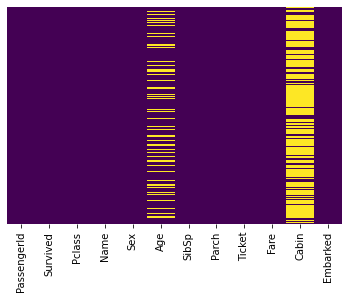

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

d:\jupyter  notebook\localenv\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


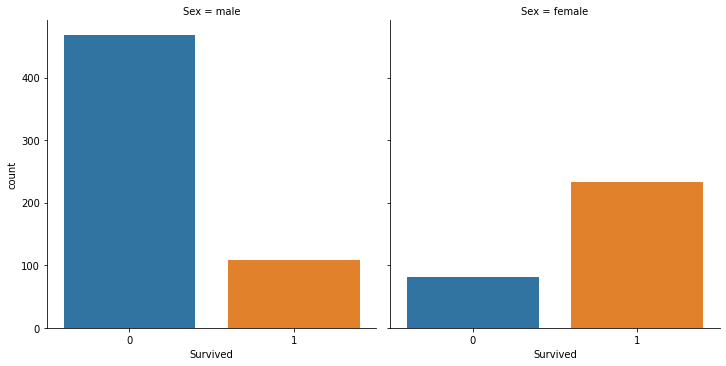

In [11]:
sns.factorplot(x='Survived',col='Sex',kind='count',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

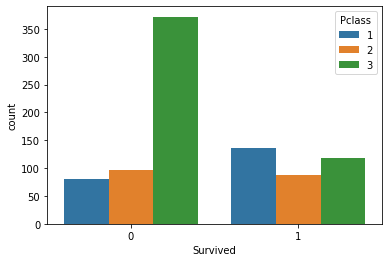

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=train)

d:\jupyter  notebook\localenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

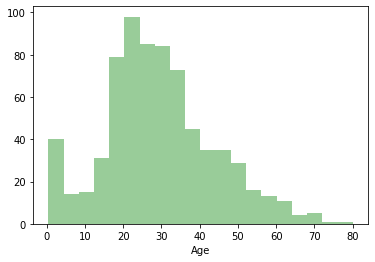

In [13]:
sns.distplot(train['Age'].dropna(),kde=False,color='green')

<AxesSubplot:xlabel='Parch', ylabel='count'>

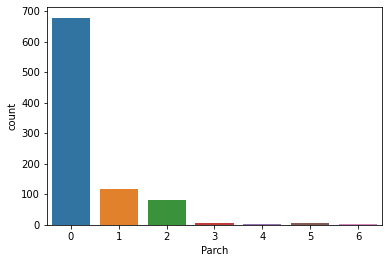

In [14]:
sns.countplot(x = 'Parch', data = train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

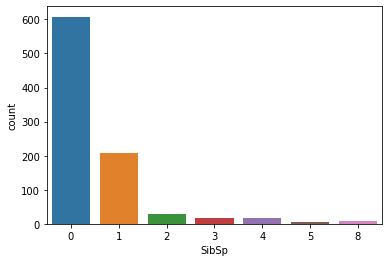

In [15]:
sns.countplot(x = 'SibSp', data = train)

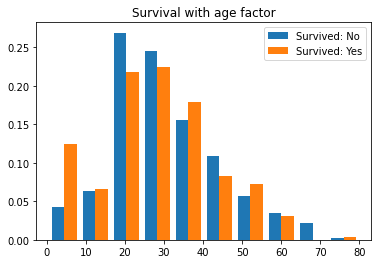

In [16]:
# Relative frequency
import sys
dt0 = train['Age'][train['Survived']==0]
dt1 = train['Age'][train['Survived']==1]
bins = np.arange(0, train['Age'].max()+5, 5)
plt.hist([dt0,dt1], label=['Survived: No','Survived: Yes'], 
         weights = [np.zeros_like(dt0)+1. / dt0.value_counts().sum(), 
                    np.zeros_like(dt1)+1. / dt1.value_counts().sum()])
plt.legend(loc='upper right')
plt.title('Survival with age factor');

In [17]:
col = ['Pclass', 'Sex','Cabin', 'Embarked']

for i in col:
    print('\n{}'.format(i))
    print(train[i].value_counts()) # The Absolute frequency
    print(train[i].value_counts()/train[i].value_counts().sum()) # The Average Frequency


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Sex
male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
B96 B98        0.019608
G6             0.019608
C23 C25 C27    0.019608
C22 C26        0.014706
F33            0.014706
                 ...   
E34            0.004902
C7             0.004902
C54            0.004902
E36            0.004902
C148           0.004902
Name: Cabin, Length: 147, dtype: float64

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


In [18]:
# Since Cabin have a lot of missing values we will drop it.
# Name, PassengerId, Ticket will not contribute in identifying whether an indivivual will be able to survive or not.
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [20]:
# Above we identified that age is a factor which depends on survival.
# Along with that we also identified sex is a factor.
# On identifying this graph we are able to see that the Pclass{invesely proportional}, SibSp, Parch, 
train.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [21]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
print(train['Age'].mean())

29.69911764705882


In [22]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
most_repeated = "S"
train.Embarked.replace(np.nan, most_repeated, inplace=True)
test.Embarked.replace(np.nan, most_repeated, inplace=True)

In [24]:
Embarked_transform_dict = {"S":1, "C":2, "Q":3}
for value in Embarked_transform_dict:
    train.Embarked.replace(value, Embarked_transform_dict.get(value), inplace=True)
    test.Embarked.replace(value, Embarked_transform_dict.get(value), inplace=True)
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,2
2,1,3,female,26.0,0,0,7.9250,1
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,1


In [25]:
train['Sex'].head

<bound method NDFrame.head of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [26]:
# Sex column.
Sex_dict = {"male":1, "female":2}
for key, value in Sex_dict.items():
    train.Sex.replace(key, value, inplace=True)
    test.Sex.replace(key, value, inplace=True)
train.Sex = train.Sex.astype("int64")
test.Sex = test.Sex.astype("int64")
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,2,38.0,1,0,71.2833,2
2,1,3,2,26.0,0,0,7.9250,1
3,1,1,2,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [27]:
# Enter to Fare column
# calculate the range of value in Fare column.
print("Range of Fare column values = ", train.Fare.max() - train.Fare.min())
# min value is 0.0 and max value = 512.3292
# i will divied this range to 10 sections.
test.Fare.replace(np.nan, test.Fare.mean(), inplace=True)
print("Range of Fare column values = ", test.Fare.max() - test.Fare.min())

Range of Fare column values =  512.3292
Range of Fare column values =  512.3292


In [28]:
train.Fare = train.Fare.astype("int64")
test.Fare = test.Fare.astype("int64")

train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7,1
1,1,1,2,38.000000,1,0,71,2
2,1,3,2,26.000000,0,0,7,1
3,1,1,2,35.000000,1,0,53,1
4,0,3,1,35.000000,0,0,8,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13,1
887,1,1,2,19.000000,0,0,30,1
888,0,3,2,29.699118,1,2,23,1
889,1,1,1,26.000000,0,0,30,2


In [29]:
train['Age'] = np.where((train['Age'] == 0), np.nan, train['Age'])
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7,1
1,1,1,2,38.0,1,0,71,2
2,1,3,2,26.0,0,0,7,1
3,1,1,2,35.0,1,0,53,1
4,0,3,1,35.0,0,0,8,1


In [31]:
test['Age'] = np.where((test['Age'] == 0), np.nan, test['Age'])
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [32]:
train.Survived.corr(train.Age)

-0.06980851528714307

In [33]:
train.Fare.unique()

array([  7,  71,  53,   8,  51,  21,  11,  30,  16,  26,  31,  29,  13,
        18,  35, 263,  27, 146,  10,  82,  52,   9,  41,  15,  17,  39,
        76,  61,  46,  80,  83,  73,  14,  56,  12,  47,  34,  20,  63,
        23,  77,  24, 247,  22,   6,  79,  36,  66,  69,  55,  25,  33,
        28,   0,  50, 113,  90,  86, 512, 153, 135,  19,  78,  91, 151,
       110, 108, 262, 164, 134,  57, 133,  75, 211,   4, 227, 120,  32,
        81,  89,  38,  49,  59,  93, 221, 106,  40,  42,  65,  37,   5],
      dtype=int64)

In [34]:
test.Fare.unique()

array([  7,   9,   8,  12,  29,  24,  26,  82,  61,  27,  59,   3,  31,
       262,  14,  30,  21,  20,  23,  57,  56,  13,  52,  76,  15,  60,
       263,  16,  42,  28, 211,  25, 221,  10,  78,  55,  22,   6,  75,
        46, 151,  18,  51,  83,  35,  50,  34,  39,  36,  53, 247,  69,
        32, 134, 227,  73, 164,  65,  71, 106, 136,  17,   0,  81,  41,
        45,  93, 135, 146,  79, 512,  63,  37,  11,  47,  90, 108],
      dtype=int64)

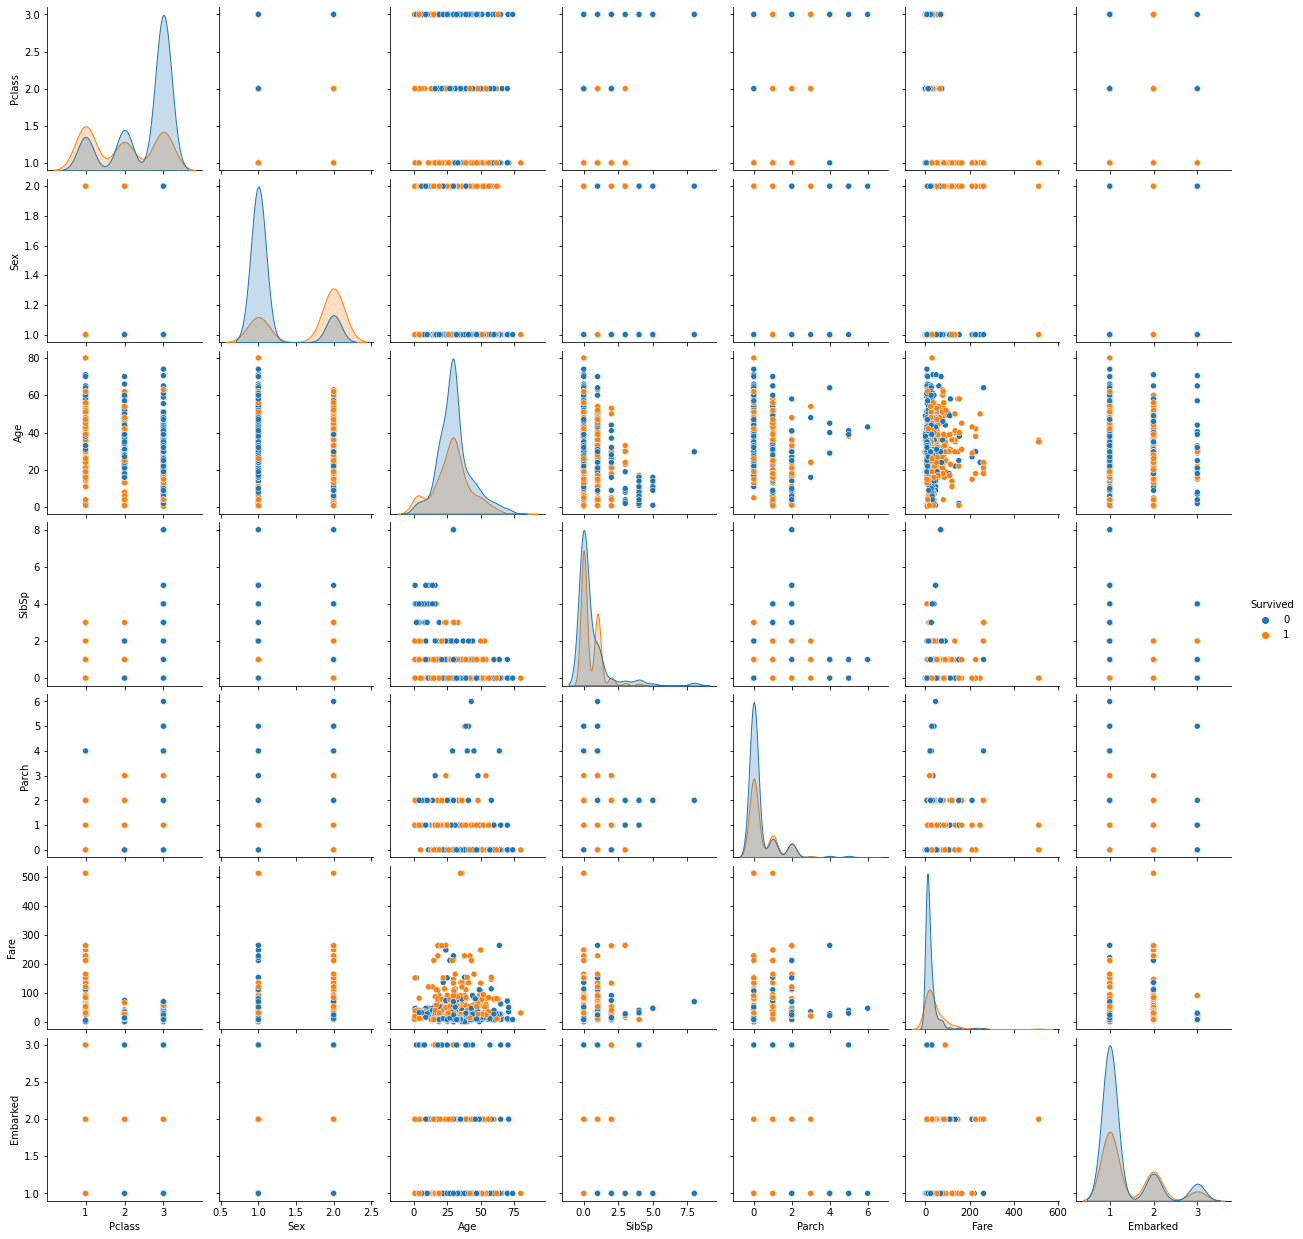

In [35]:
sns.pairplot(data = train, hue = 'Survived')
plt.show()

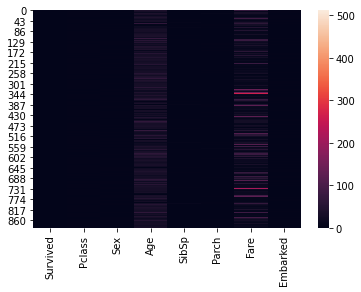

In [36]:
sns.heatmap(data = train)
plt.show()

In [37]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Machine Learning Classification 

In [38]:
colm = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train[colm]
Y_train = train['Survived']
len(Y_train)

891

In [39]:
y = LabelEncoder().fit_transform(Y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 7) (179, 7) (712,) (179,)


## Decision Tree

In [40]:
classifier_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
Y_pred1 = classifier_tree.predict(X_test)

from  sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,Y_pred1))

[[99 11]
 [22 47]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



In [43]:
print(round(classifier_tree.score(X_train, y_train) * 100, 2), "%")

96.21 %


## Random Forest

In [44]:
classifier_random = RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.1, n_jobs=-1)
classifier_random.fit(X_train, y_train)

RandomForestClassifier(max_features=0.1, min_samples_leaf=2, n_estimators=40,
                       n_jobs=-1)

In [45]:
Y_pred2 = classifier_random.predict(X_test)

print(confusion_matrix(y_test,Y_pred2))

[[100  10]
 [ 19  50]]


In [46]:
print(classification_report(y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [47]:
print(round(classifier_random.score(X_train, y_train) * 100, 2), "%")

89.75 %


## SVM

In [48]:
classifier_svm = SVC(kernel = 'linear', random_state=0, probability=True)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [49]:
Y_pred3 = classifier_svm.predict(X_test)

print(confusion_matrix(y_test,Y_pred3))

[[92 18]
 [20 49]]


In [50]:
print(classification_report(y_test, Y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [51]:
print(round(classifier_svm.score(X_train, y_train) * 100, 2), "%")

78.65 %


## K - nearest Neighbor

In [52]:
classifier_knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
Y_pred4 = classifier_knn.predict(X_test)

print(confusion_matrix(y_test, Y_pred4))

[[96 14]
 [37 32]]


In [54]:
print(classification_report(y_test, Y_pred4))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       110
           1       0.70      0.46      0.56        69

    accuracy                           0.72       179
   macro avg       0.71      0.67      0.67       179
weighted avg       0.71      0.72      0.70       179



In [55]:
print(round(classifier_knn.score(X_train, y_train) * 100, 2), "%")

83.57 %


## Naive Bayes

In [56]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [57]:
Y_pred5 = classifier_nb.predict(X_test)

print(confusion_matrix(y_test, Y_pred5))

[[90 20]
 [17 52]]


In [58]:
print(classification_report(y_test, Y_pred5))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



In [59]:
print(round(classifier_nb.score(X_train, y_train) * 100, 2), "%")

79.21 %


## Logistic Regression

In [60]:
classifier_log = LogisticRegression(solver='liblinear', max_iter=1000)
classifier_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [61]:
Y_pred6 = classifier_log.predict(X_test)

print(confusion_matrix(y_test, Y_pred6))

[[92 18]
 [17 52]]


In [62]:
print(classification_report(y_test, Y_pred6))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [63]:
print(round(classifier_log.score(X_train, y_train) * 100, 2), "%")

80.06 %


In [64]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [65]:
test['Fare'].unique()

array([  7,   9,   8,  12,  29,  24,  26,  82,  61,  27,  59,   3,  31,
       262,  14,  30,  21,  20,  23,  57,  56,  13,  52,  76,  15,  60,
       263,  16,  42,  28, 211,  25, 221,  10,  78,  55,  22,   6,  75,
        46, 151,  18,  51,  83,  35,  50,  34,  39,  36,  53, 247,  69,
        32, 134, 227,  73, 164,  65,  71, 106, 136,  17,   0,  81,  41,
        45,  93, 135, 146,  79, 512,  63,  37,  11,  47,  90, 108],
      dtype=int64)

In [66]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7,3
1,3,2,47.0,1,0,7,1
2,2,1,62.0,0,0,9,3
3,3,1,27.0,0,0,8,1
4,3,2,22.0,1,1,12,1


In [67]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [68]:
sub.Survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [69]:
Y1 = classifier_tree.predict(test)

print(confusion_matrix(sub['Survived'], Y1))

[[219  47]
 [ 54  98]]


In [70]:
print(classification_report(sub['Survived'], Y1))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       266
           1       0.68      0.64      0.66       152

    accuracy                           0.76       418
   macro avg       0.74      0.73      0.74       418
weighted avg       0.76      0.76      0.76       418



In [71]:
Y2 = classifier_random.predict(test)

print(confusion_matrix(sub['Survived'], Y2))

[[234  32]
 [ 35 117]]


In [72]:
print(classification_report(sub['Survived'], Y2))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       266
           1       0.79      0.77      0.78       152

    accuracy                           0.84       418
   macro avg       0.83      0.82      0.83       418
weighted avg       0.84      0.84      0.84       418



In [73]:
Y3 = classifier_svm.predict(test)

print(confusion_matrix(sub['Survived'], Y3))

[[266   0]
 [  0 152]]


In [74]:
print(classification_report(sub['Survived'], Y3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [75]:
Y4 = classifier_knn.predict(test)

print(confusion_matrix(sub['Survived'], Y4))

[[197  69]
 [ 75  77]]


In [76]:
print(classification_report(sub['Survived'], Y4))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       266
           1       0.53      0.51      0.52       152

    accuracy                           0.66       418
   macro avg       0.63      0.62      0.62       418
weighted avg       0.65      0.66      0.65       418



In [77]:
Y5 = classifier_nb.predict(test)

print(confusion_matrix(sub['Survived'], Y5))

[[243  23]
 [  5 147]]


In [78]:
print(classification_report(sub['Survived'], Y5))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       266
           1       0.86      0.97      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.94      0.93       418
weighted avg       0.94      0.93      0.93       418



In [79]:
Y6 = classifier_log.predict(test)

print(confusion_matrix(sub['Survived'], Y6))

[[252  14]
 [ 11 141]]


In [80]:
print(classification_report(sub['Survived'], Y6))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [81]:
### Since the SVM Model shows the best output hence we will now make the final csv file

In [82]:
Y3 = np.array(Y3)
df = pd.DataFrame(Y3.reshape(-1, len(Y3)), columns=None)
df = df.T
df.columns = ["Survived"]
df

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [83]:
test1 = pd.read_csv("test.csv")

In [84]:
res = df
pid = test1['PassengerId']
my_sub = [pid, res]
my_sub = pd.concat(my_sub, axis=1)
my_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [85]:
my_sub.to_csv('my_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
